# 3.2-Clustering and further filtering

**Inés Sentís**

Date of execution 

In [1]:
Sys.Date()

[1] "2025-01-20"

## Introduction

Normalize data and do unsupervised clustering for each fraction of the experiment

In [2]:
sample <- "41BBneg"

## Libraries

In [3]:
suppressMessages(suppressWarnings({
library(Seurat)
library(here)
library(glue)
library(tidyverse)
library(grid)
library(gridExtra)
library(ggplot2)
library(scater) 
library(scran)
}))

## Parameters

In [4]:
#dr_here(show_reason = TRUE)
source(here("SCGRES_124_125/sc_analysis/misc/paths.R"))
source(here("SCGRES_124_125/sc_analysis/misc/variables.R"))
source(here("utils/bin.R"))

set.seed(0)

## Load data

In [5]:
seurat_obj <- readRDS(here(glue("{clust}/{robj_dir}/dimred_combined_object_{sample}.rds")))

In [6]:
var_name <- paste0("comp_", sample)
dcomp <- get(var_name)

### First clustering to localize doublets

In [7]:
reso = 0.2

In [8]:
seurat_obj <- FindNeighbors(seurat_obj, reduction = "pca", dims = dcomp)
seurat_obj <- FindClusters(seurat_obj, resolution = reso)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11297
Number of edges: 364286

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9205
Number of communities: 9
Elapsed time: 1 seconds


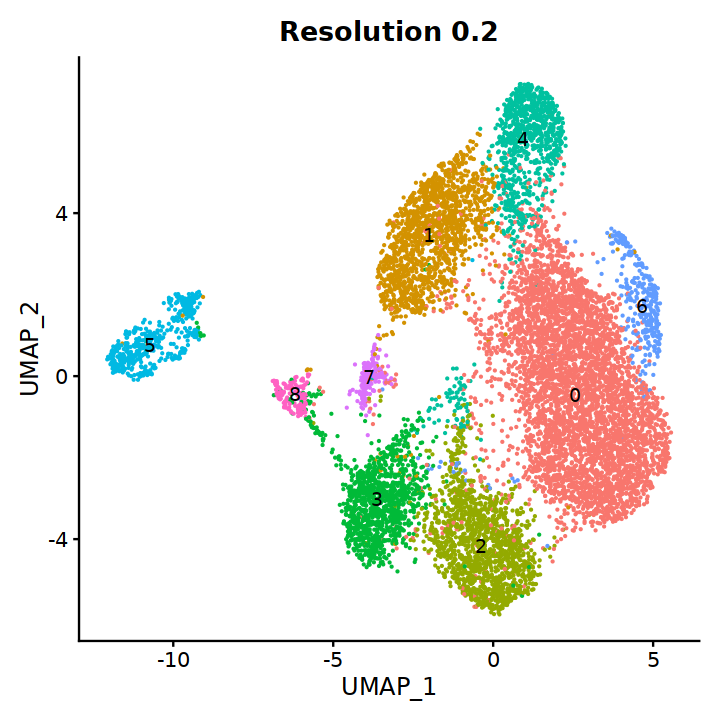

In [9]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(seurat_obj, reduction = "umap", label = T)+ NoLegend() +
  labs(title=glue("Resolution {reso}")) + theme(plot.title = element_text(hjust = 0.5))

In [10]:
rna.markers <- FindAllMarkers(seurat_obj, min.pct=0.1, 
                              logfc.threshold=0.1, 
                              random.seed=0, 
                              max.cells.per.ident=1000,
                              only.pos=TRUE)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



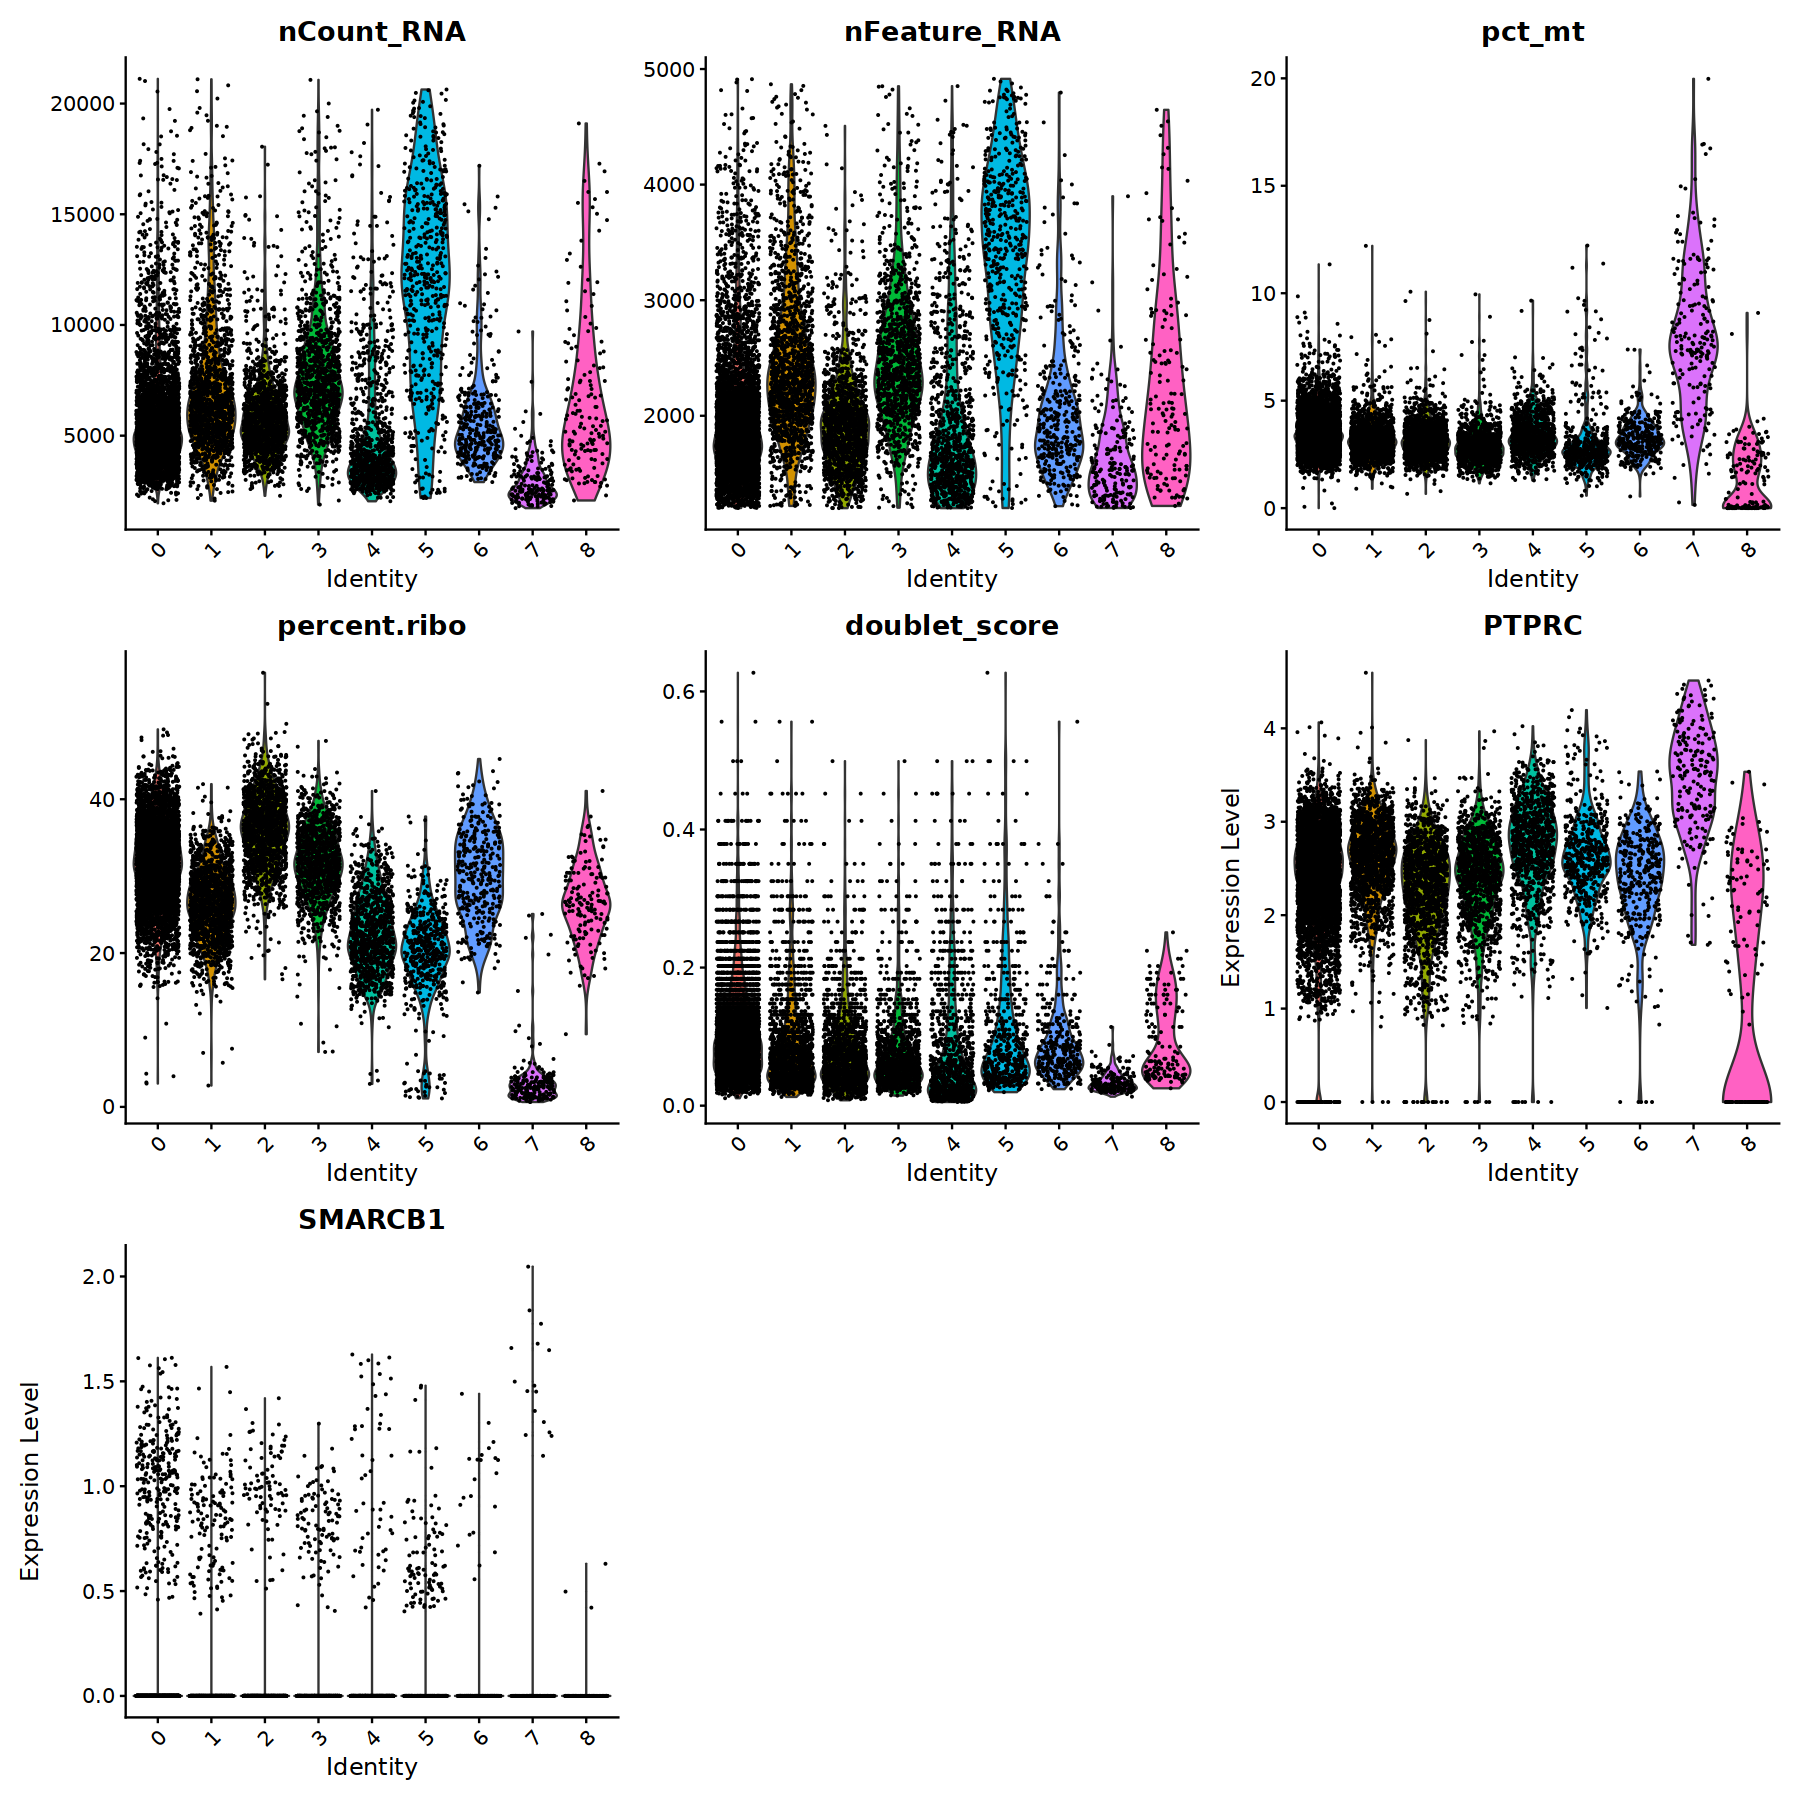

In [11]:
options(repr.plot.width = 15, repr.plot.height = 15, warn=-1,verbose = FALSE)

con_vars <- c("nCount_RNA", "nFeature_RNA", "pct_mt", "percent.ribo", 
              "doublet_score", "PTPRC", "SMARCB1")

VlnPlot(seurat_obj, 
            feature=con_vars, ncol=3)

low quality cells 

In [12]:
c <- 7

rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  arrange(desc(avg_log2FC)) %>% head(n=20)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster gene    
CHST112   8.021415e-77 2.446426   0.883 0.467 2.049953e-72 7       CHST11  
PRKCA     6.797367e-59 2.401333   0.806 0.453 1.737135e-54 7       PRKCA   
NEAT1     2.893671e-54 2.272852   0.888 0.722 7.395064e-50 7       NEAT1   
PDE3B1    1.016779e-70 2.195899   0.995 0.898 2.598480e-66 7       PDE3B   
PDE7B3    1.958506e-06 2.178972   0.418 0.331 5.005157e-02 7       PDE7B   
ZBTB201   3.114373e-56 2.156608   0.883 0.713 7.959092e-52 7       ZBTB20  
FOXN3     2.817063e-48 2.068537   0.781 0.504 7.199285e-44 7       FOXN3   
SOS12     3.406819e-64 2.050378   0.934 0.678 8.706466e-60 7       SOS1    
ARHGAP152 1.105385e-75 2.025862   0.990 0.929 2.824922e-71 7       ARHGAP15
ANK31     2.385208e-29 1.982252   0.653 0.411 6.095638e-25 7       ANK3    
MGAT52    5.673250e-39 1.951001   0.587 0.249 1.449856e-34 7       MGAT5   
ANKRD11   2.075814e-59 1.948775   0.832 0.512 5.304950e-55 7       ANKRD11 
ARID1B1   1.873301e-48 1.942259   0.730 0.377 4.787409e-44 7       ARID1B  
PRKCH2    3.587747e-65 1.939414   0.913 0.734 9.168847e-61 7       PRKCH   
SERINC51  6.088704e-43 1.935477   0.776 0.519 1.556029e-38 7       SERINC5 
PIP4K2A3  6.104566e-42 1.934348   0.679 0.362 1.560083e-37 7       PIP4K2A 
XYLT11    1.698679e-38 1.920672   0.628 0.302 4.341143e-34 7       XYLT1   
PITPNC13  1.756413e-42 1.913167   0.755 0.445 4.488688e-38 7       PITPNC1 
CAMK4     5.820575e-68 1.894180   0.954 0.827 1.487506e-63 7       CAMK4   
FUT81     4.351724e-47 1.885555   0.806 0.546 1.112127e-42 7       FUT8

In [13]:
c <- 8

rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  arrange(desc(avg_log2FC)) %>% head(n=20)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene    
CRABP2   2.379344e-186 2.991154   0.878 0.018 6.080653e-182 8       CRABP2  
HSPD1     1.036392e-76 2.812476   0.973 0.496  2.648604e-72 8       HSPD1   
S100A13  7.254843e-169 2.702483   0.796 0.019 1.854048e-164 8       S100A13 
MT2A3     1.234173e-44 2.687937   0.905 0.584  3.154053e-40 8       MT2A    
TPM2     2.465696e-168 2.674262   0.850 0.021 6.301334e-164 8       TPM2    
HSPB12    4.183135e-93 2.598261   0.939 0.251  1.069042e-88 8       HSPB1   
HSP90AB1  1.208154e-69 2.590773   0.986 0.818  3.087560e-65 8       HSP90AB1
NME1      6.650428e-83 2.548373   0.884 0.211  1.699583e-78 8       NME1    
HSPE11    6.428491e-72 2.536305   0.980 0.474  1.642865e-67 8       HSPE1   
MT1A      1.674773e-93 2.460287   0.551 0.022  4.280049e-89 8       MT1A    
MYL9     1.513335e-157 2.345723   0.741 0.012 3.867480e-153 8       MYL9    
BEX3     1.190891e-145 2.255919   0.762 0.035 3.043442e-141 8       BEX3    
ALDH7A1  8.690277e-168 2.244325   0.782 0.013 2.220887e-163 8       ALDH7A1 
TUBA1B1   1.227548e-61 2.218466   0.932 0.434  3.137122e-57 8       TUBA1B  
GSTP13    4.458686e-59 2.067330   0.959 0.519  1.139462e-54 8       GSTP1   
SLIRP     6.152983e-66 2.055839   0.918 0.360  1.572456e-61 8       SLIRP   
NQO1     9.992528e-118 2.040604   0.680 0.049 2.553691e-113 8       NQO1    
FABP51   6.346663e-121 2.036174   0.741 0.045 1.621953e-116 8       FABP5   
MT1E      4.792425e-43 2.006682   0.544 0.112  1.224752e-38 8       MT1E    
S100A62   7.435151e-54 1.960397   1.000 0.957  1.900127e-49 8       S100A6

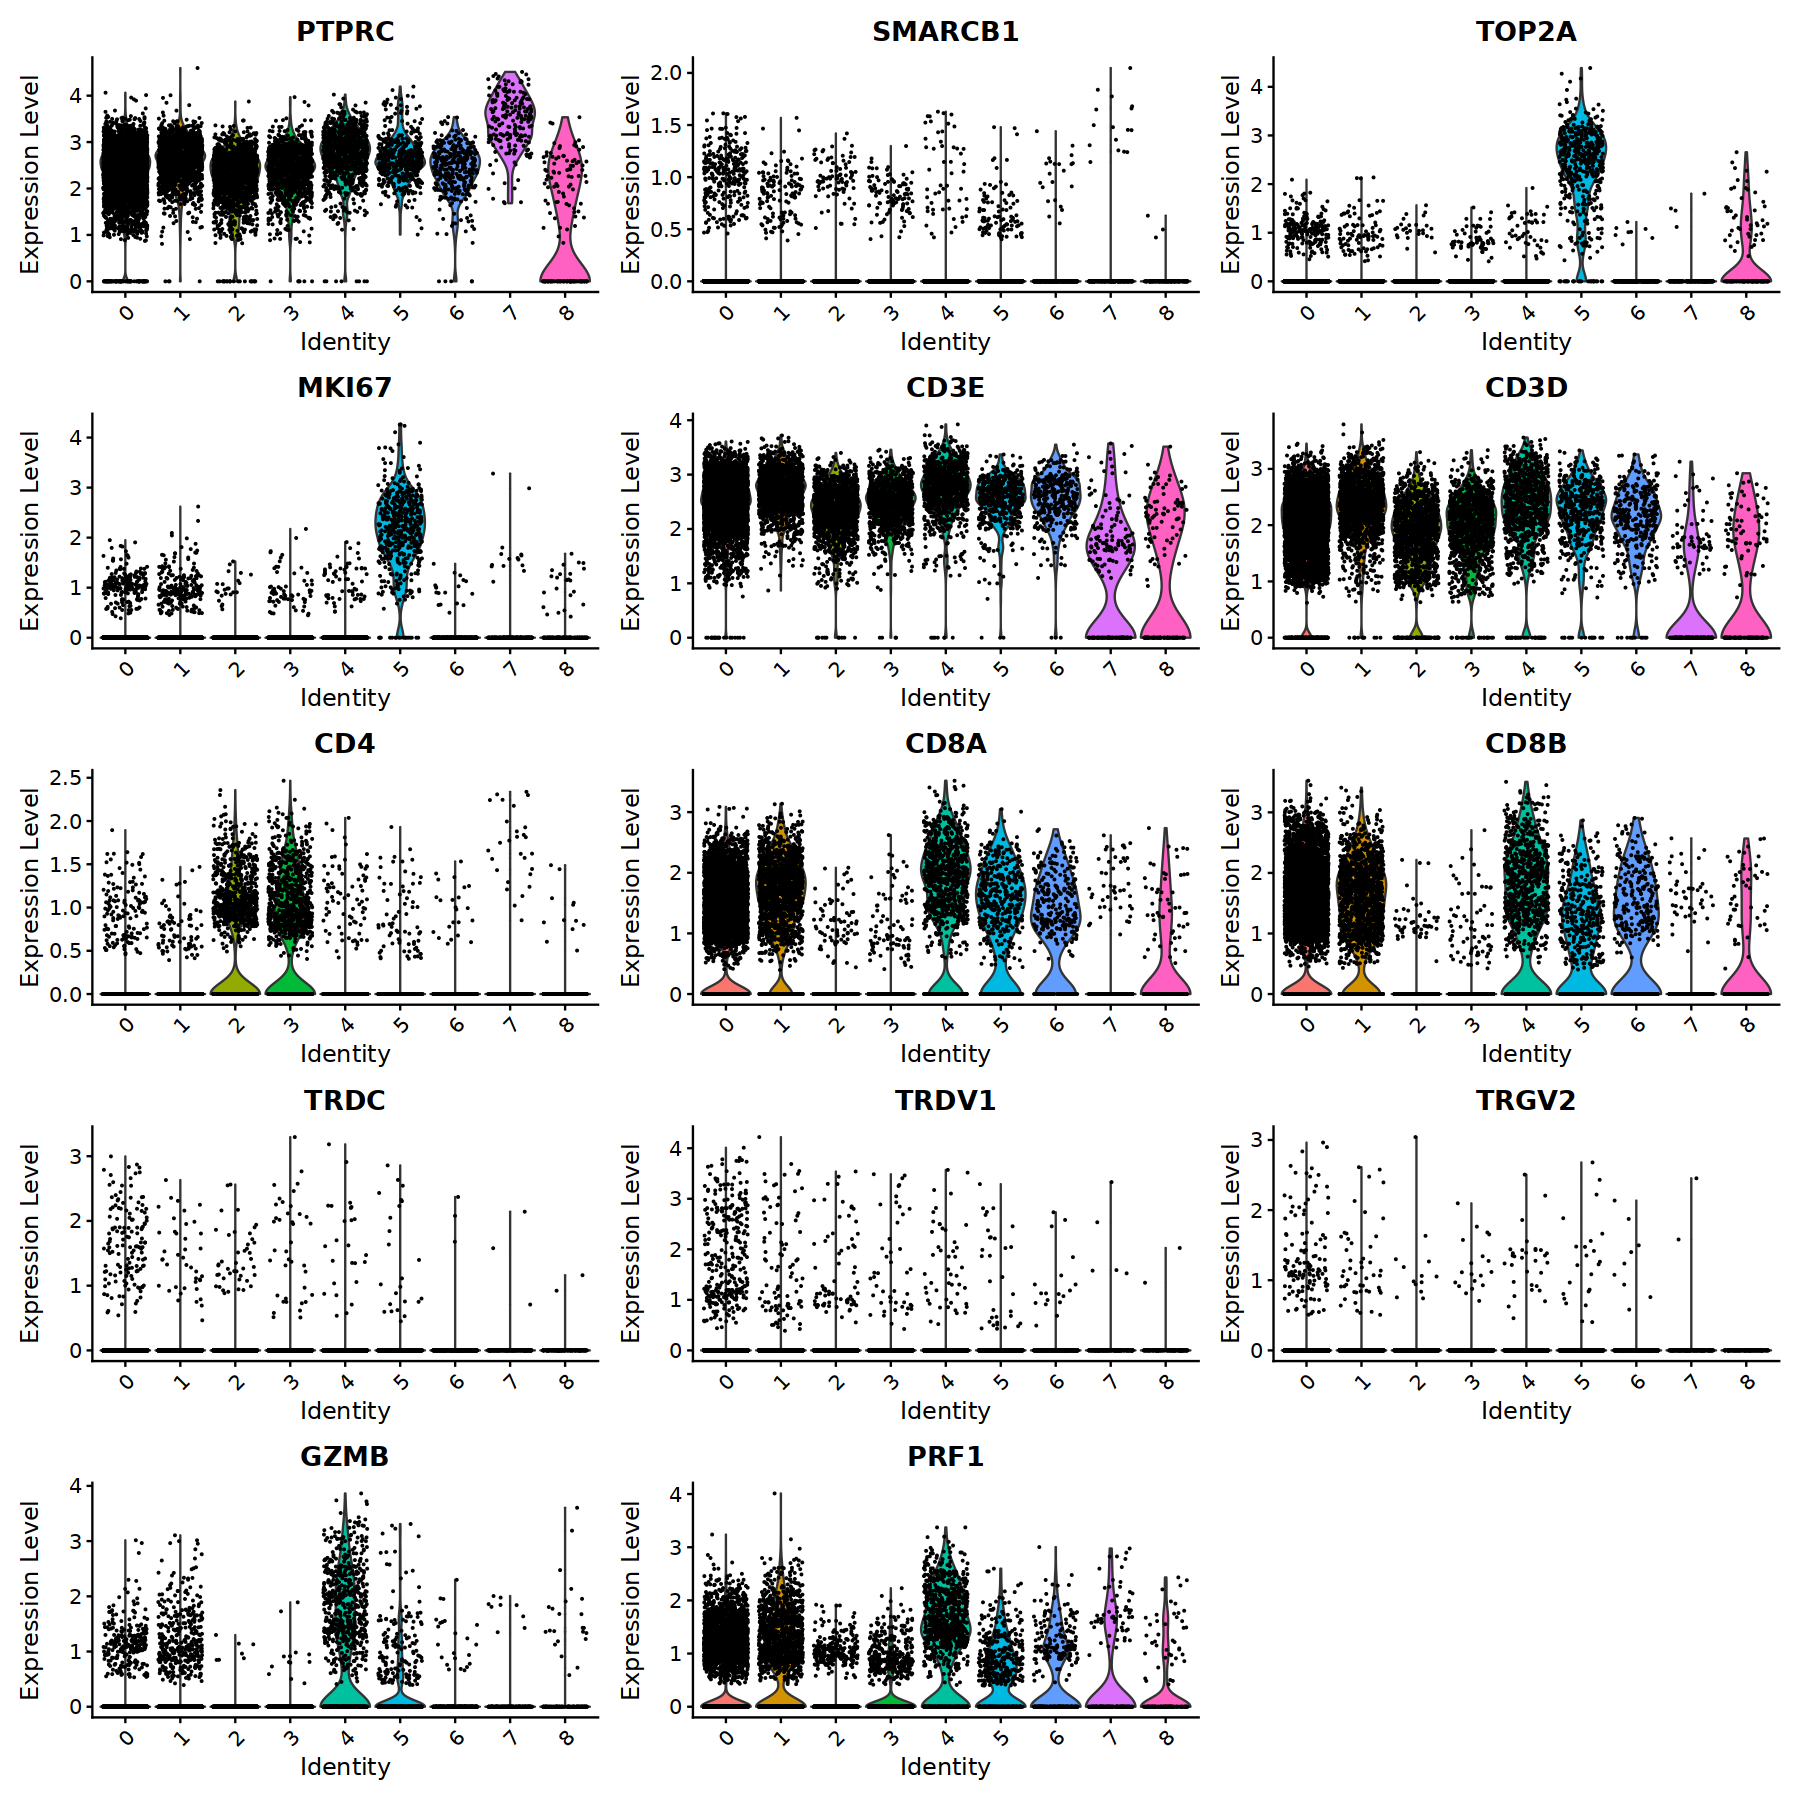

In [14]:
options(repr.plot.width = 15, repr.plot.height = 15, warn=-1,verbose = FALSE)

genes <- c("PTPRC","SMARCB1","TOP2A", "MKI67","CD3E", "CD3D",
           "CD4", "CD8A","CD8B", "TRDC","TRDV1","TRGV2", "GZMB", "PRF1")

VlnPlot(seurat_obj, 
            feature=genes, ncol=3)

### Remove Cells

In [15]:
seurat_obj <- subset(x = seurat_obj, idents=c(7,8), invert=TRUE)

In [16]:
seurat_obj <- DietSeurat(
  seurat_obj,
  counts = TRUE,
  data = TRUE,
  scale.data = FALSE,
  features = NULL,
  assays = NULL,
  dimreducs = FALSE,
  graphs = NULL
)

In [17]:
print(table(rowSums(as.matrix(seurat_obj[['RNA']]@counts)) == 0))
  
keep_genes <- data.frame(rowSums(as.matrix(seurat_obj[['RNA']]@counts)) != 0)
colnames(keep_genes) <- "logical"
keep_genes <- subset(keep_genes, logical==TRUE)
seurat_obj[['RNA']]@counts <- seurat_obj[['RNA']]@counts[rownames(keep_genes), ]
seurat_obj[['RNA']]@data <- seurat_obj[['RNA']]@data[rownames(keep_genes), ]
seurat_obj


FALSE  TRUE 
24867   689 


An object of class Seurat 
24867 features across 10954 samples within 1 assay 
Active assay: RNA (24867 features, 0 variable features)

## Re-do embedding and clustering

In [18]:
seurat_obj <- NormalizeData(
  seurat_obj,
  normalization.method = "LogNormalize",
  scale.factor = 1e4
)

In [19]:
sce <- as.SingleCellExperiment(seurat_obj)
sce

class: SingleCellExperiment 
dim: 24867 10954 
metadata(0):
assays(2): counts logcounts
rownames(24867): AL627309.1 AL627309.5 ... AC004556.3 AC007325.4
rowData names(0):
colnames(10954): AAACCTGAGAGTACAT-1 AAACCTGAGATATGCA-1 ...
  TTTGTCATCGCCGTGA-1 TTTGTCATCTGTTGAG-1
colData names(18): orig.ident nCount_RNA ... seurat_clusters ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

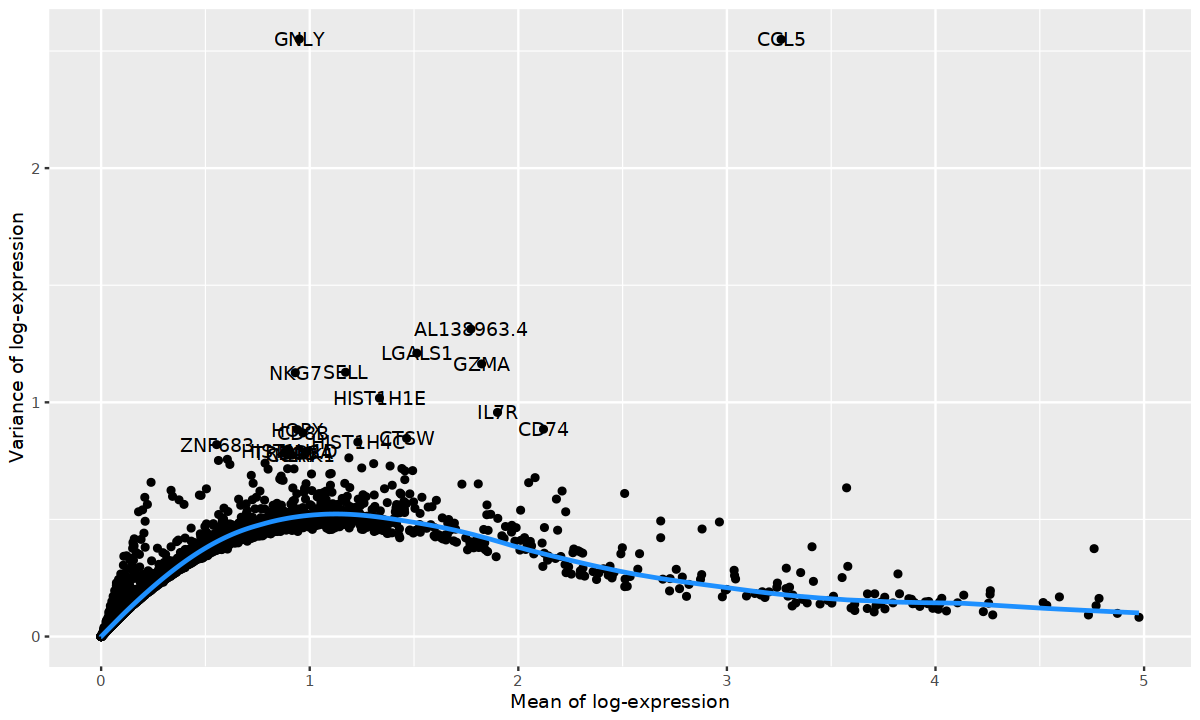

In [20]:
options(repr.plot.width = 10, repr.plot.height = 6, warn=-1,verbose = FALSE)
gene_var <- modelGeneVar(sce)

tops <- gene_var %>% 
    as.data.frame() %>% 
    arrange(desc(total)) %>% 
    head(n=20)

gene_var %>% 
  as.data.frame() %>% 
  ggplot(aes(mean, total)) +
  geom_point() +
  geom_line(aes(y = tech), colour = "dodgerblue", size = 1) +
  labs(x = "Mean of log-expression", y = "Variance of log-expression")+
  geom_text(data=tops, aes(mean,total,label=rownames(tops)))

In [21]:
hvgs <- getTopHVGs(gene_var,fdr.threshold = 0.05)
length(hvgs)

[1] 547

In [22]:
# remove TCR genes
hvgs <- hvgs[!grepl("^TR[AB][VJC]", hvgs)]
length(hvgs)

VariableFeatures(seurat_obj) <- hvgs

[1] 449

In [23]:
seurat_obj <- seurat_obj %>%
  ScaleData(features=hvgs) %>% 
  RunPCA(features=hvgs)

Centering and scaling data matrix

PC_ 1 
Positive:  RPL10, TPT1, FTL, LTB, IL7R, TXNIP, EEF1B2, CCR7, CD52, SELL 
	   RIPOR2, TMSB10, RPLP1, NOSIP, AL138963.4, MTRNR2L12, S100A4, NELL2, S100B, MALAT1 
	   RPLP0, KRT1, KLRB1, IFIT1, CTSW, GZMK, HPGDS, MX1, AL627171.2, LINC02109 
Negative:  UBE2C, ASPM, TOP2A, KIFC1, CDK1, DLGAP5, GTSE1, HJURP, CKAP2L, RRM2 
	   CDCA8, CENPF, CDCA2, MKI67, BIRC5, KNL1, HMMR, NUSAP1, KIF23, TPX2 
	   PLK1, KIF15, KIF14, CCNB2, KIF2C, CDKN3, CDC20, STMN1, CENPE, HIST1H3B 
PC_ 2 
Positive:  EEF1B2, RPLP0, RPL10, RPLP1, IL7R, TPT1, SELL, CCR7, PDE7B, IFITM1 
	   AL138963.4, PDE3B, KRT1, IFITM2, NOSIP, LTB, RIPOR2, HIST1H4C, TXNIP, FTL 
	   HPGDS, CDCA2, TUBA1B, CDK1, HJURP, UBE2C, CKAP2L, HMMR, BIRC5, RRM2 
Negative:  NKG7, GNLY, CST7, CCL4, CCL5, GZMB, GZMH, HLA-DRB1, GZMK, CD74 
	   HLA-DRA, CXCR3, ZNF683, HLA-DQA1, CD8A, CCL4L2, HOPX, KLRK1, GZMA, LINC02694 
	   EOMES, AC243829.4, PPP1R14B, CTSW, CD52, CXCR6, CD8B, CCL3, XCL1, KLRD1 
PC_ 3 
Positive:  PD

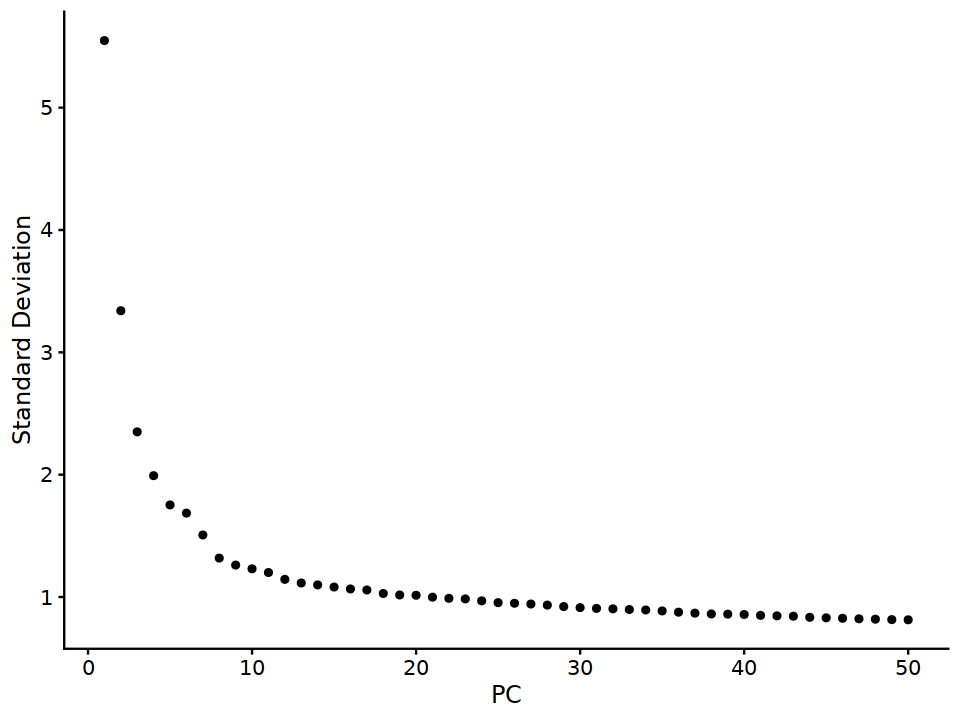

In [24]:
options(repr.plot.width = 8, repr.plot.height = 6)
ElbowPlot(seurat_obj, n=50)

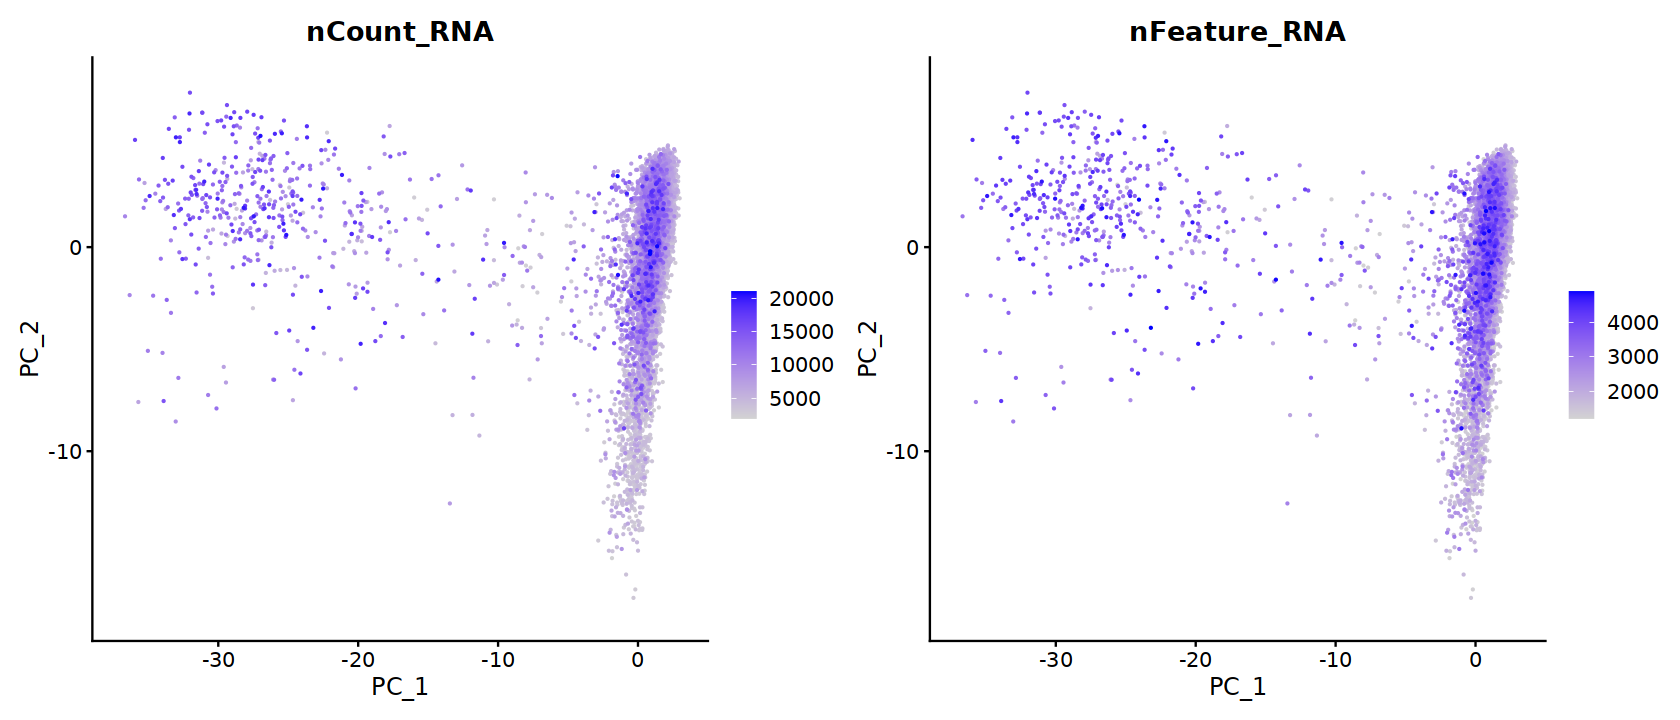

In [25]:
options(repr.plot.width = 14, repr.plot.height = 6)
FeaturePlot(object = seurat_obj, reduction = "pca",
        features = c("nCount_RNA","nFeature_RNA"), order=T)

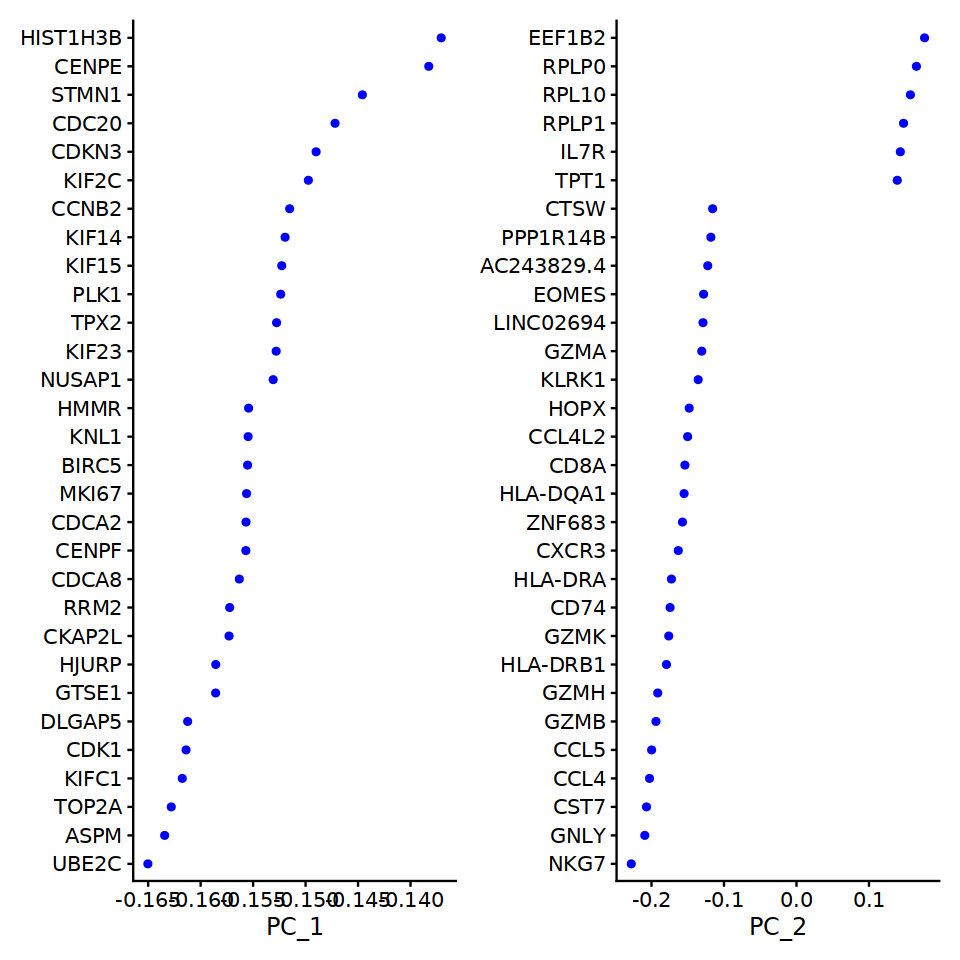

In [26]:
options(repr.plot.width = 8, repr.plot.height = 8, warn=-1,verbose = FALSE)
VizDimLoadings(seurat_obj, dims = 1:2, reduction = "pca")

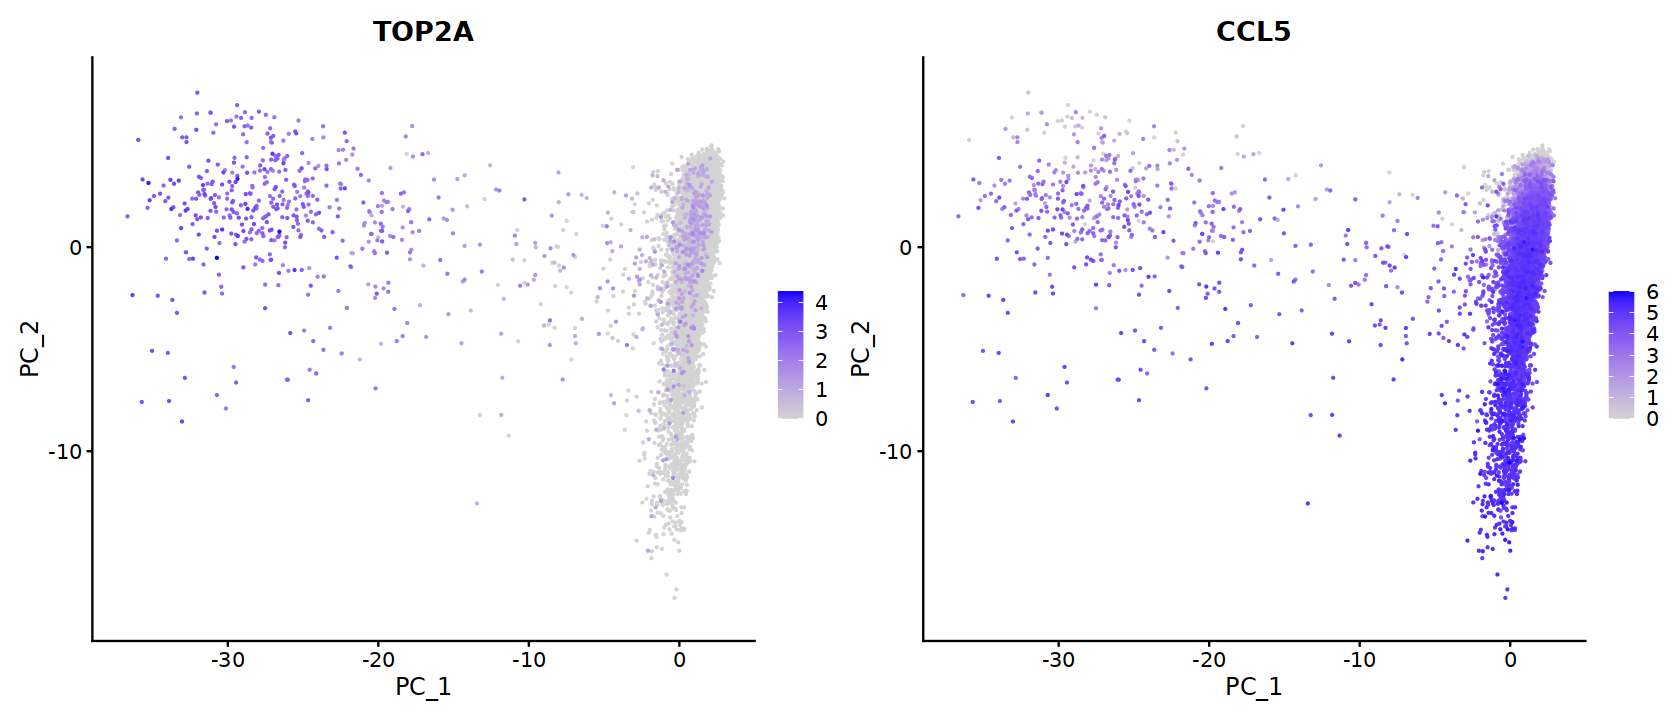

In [27]:
options(repr.plot.width = 14, repr.plot.height = 6)
FeaturePlot(object = seurat_obj, reduction = "pca",
        features = c("TOP2A","CCL5"), order=T)

In [28]:
seurat_obj <- RunUMAP(
  seurat_obj,
  dims = dcomp,
  reduction = "pca",
  reduction.name = "umap",
  reduction.key = "UMAP_"
)

11:18:16 UMAP embedding parameters a = 0.9922 b = 1.112

11:18:16 Read 10954 rows and found 15 numeric columns

11:18:16 Using Annoy for neighbor search, n_neighbors = 30

11:18:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:18:17 Writing NN index file to temp file /scratch_tmp/34289041/RtmpauKZi7/file90d27771446

11:18:17 Searching Annoy index using 1 thread, search_k = 3000

11:18:20 Annoy recall = 100%

11:18:21 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

11:18:23 Initializing from normalized Laplacian + noise (using irlba)

11:18:23 Commencing optimization for 200 epochs, with 457416 positive edges

11:18:35 Optimization finished



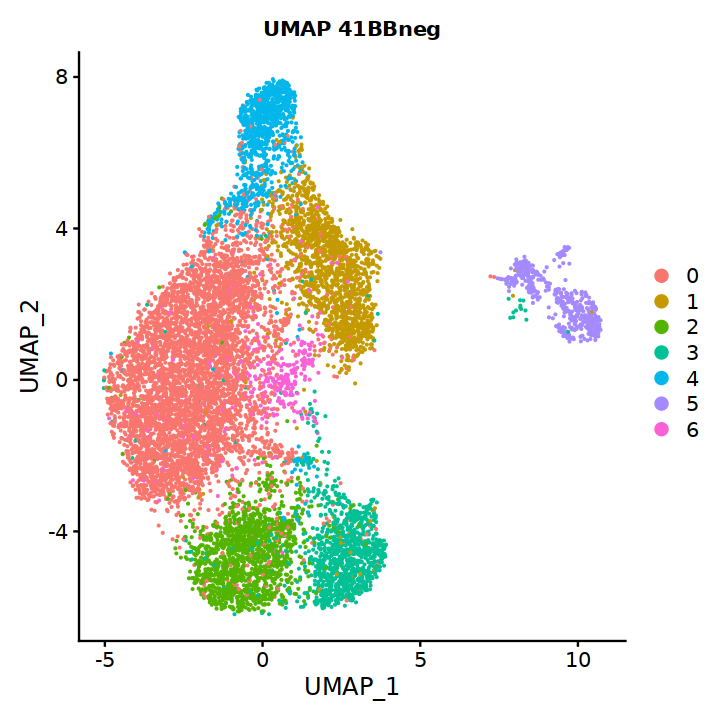

In [29]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1
) + ggtitle(glue('UMAP {sample}')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

In [30]:
# Find the K-nearest neighbors
seurat_obj <- FindNeighbors(seurat_obj, reduction = "pca", dims = dcomp)
# Find clusters at different resolutions
clusters_df <- cluster_diff_resolutions(
  seurat_obj = seurat_obj,
  min_resolution = 0.1,
  max_resolution = 1.0,
  step = 0.1
)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10954
Number of edges: 348897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9410
Number of communities: 4
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10954
Number of edges: 348897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9114
Number of communities: 8
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10954
Number of edges: 348897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8892
Number of communities: 9
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10954
Number of edges: 348897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8681
Number of communities: 9
Elapsed time: 1 seconds
Modularity Optim

In [31]:
list_plots <- lapply(unique(clusters_df$resolution), function(x) {
  p <- add_reso_results(seurat_obj, clusters_df, resolution=x)
  umap <- DimPlot(p, reduction = "umap", 
                  group.by=glue::glue("seurat_clusters")) +
    labs(title=glue::glue("Resolution {x}"))
  return(umap)
})

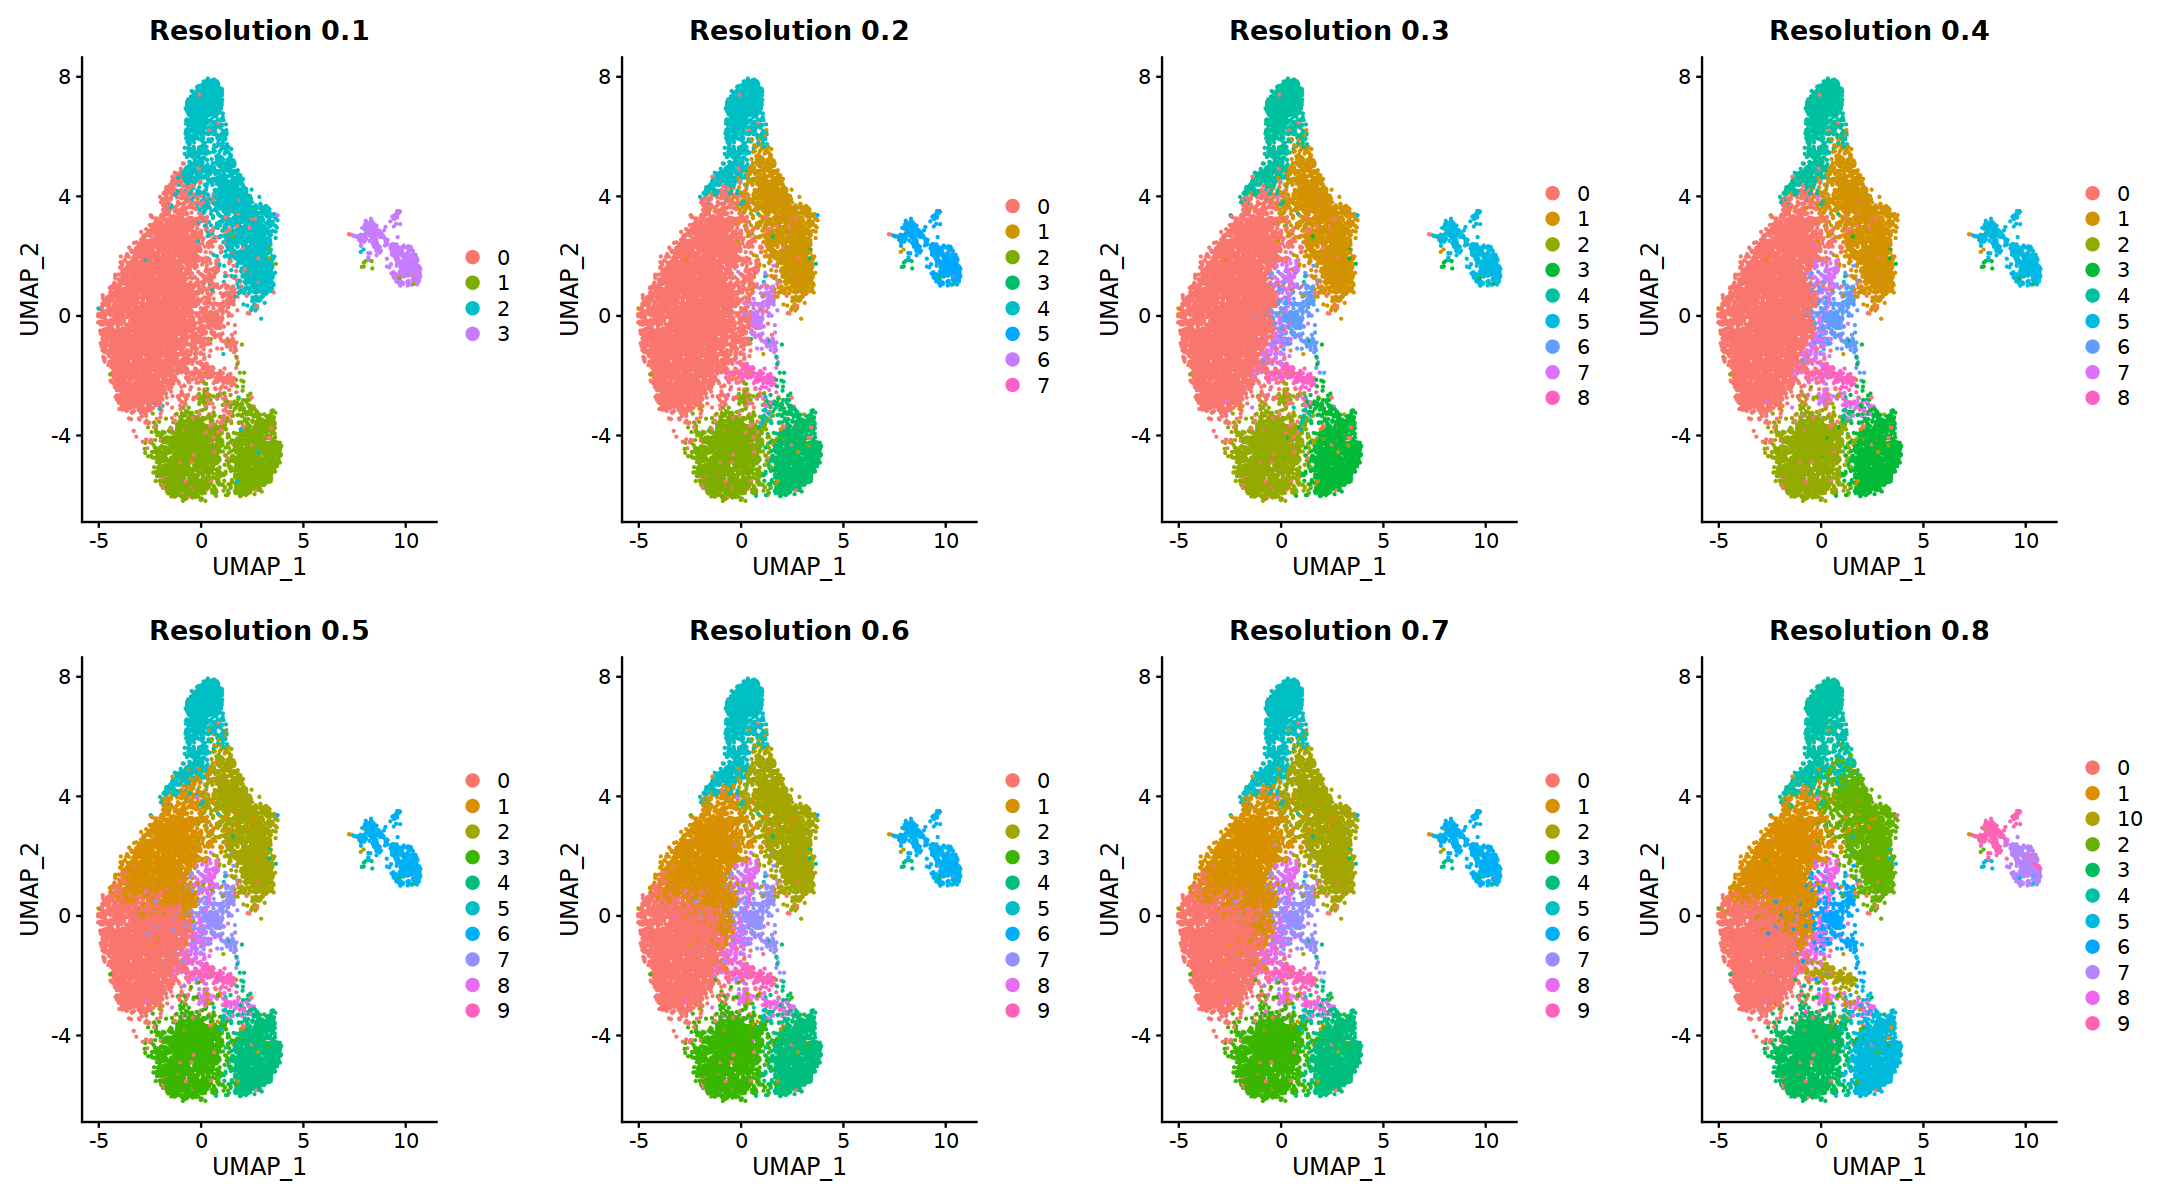

In [32]:
options(repr.plot.width = 18, repr.plot.height = 10, warn=-1,verbose = FALSE)
cp <- cowplot::plot_grid(plotlist = list_plots,
                   align = "hv",
                   axis = "trbl",
                   ncol=4,
                   nrow=2)
cp

In [33]:
reso = 0.5

In [34]:
seurat_obj <- FindClusters(seurat_obj, resolution = reso)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10954
Number of edges: 348897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8503
Number of communities: 10
Elapsed time: 1 seconds


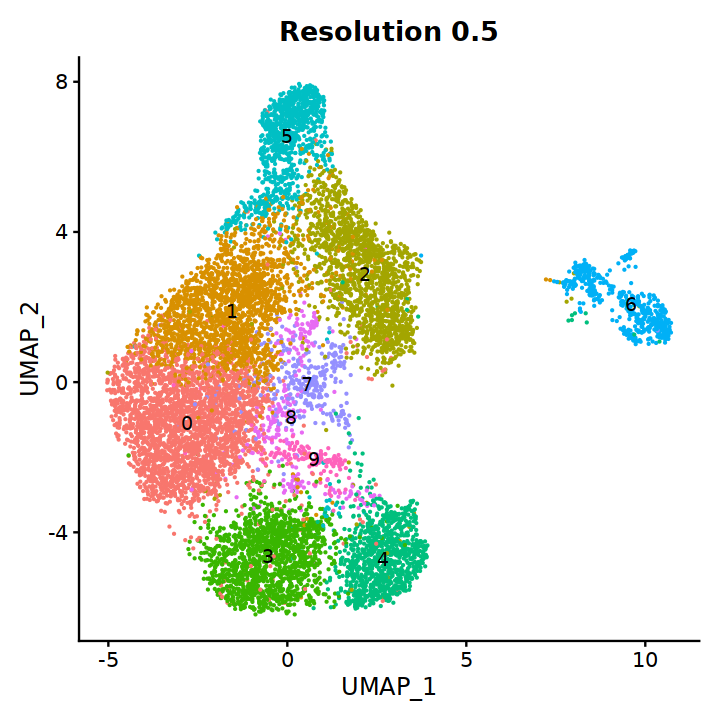

In [35]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(seurat_obj, reduction = "umap", label = T)+ NoLegend() +
  labs(title=glue("Resolution {reso}")) + theme(plot.title = element_text(hjust = 0.5))

In [36]:
rna.markers <- FindAllMarkers(seurat_obj, min.pct = 0.1, 
                              logfc.threshold = 0.1, only.pos = T,
                              random.seed=0, max.cells.per.ident=1000)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



In [37]:
cat_vars <-c("Phase")
con_vars <- c("TOP2A","STMN1","CD3E", "CD3D","TNFRSF9",
              "CD4", "CD8A","CD8B","SELL","IL7R", 
              "CCL5", "GZMB")
vars <- c(cat_vars, con_vars)

In [38]:
# compute plots
list_plots <- lapply(vars, function(var){
  if (var %in% cat_vars) {
      p <- DimPlot(seurat_obj, reduction = "umap", group.by=var)
  } else {
      p <- FeaturePlot(seurat_obj, reduction = "umap", feature=var, 
                       order = TRUE)
  }
  return(p)
})

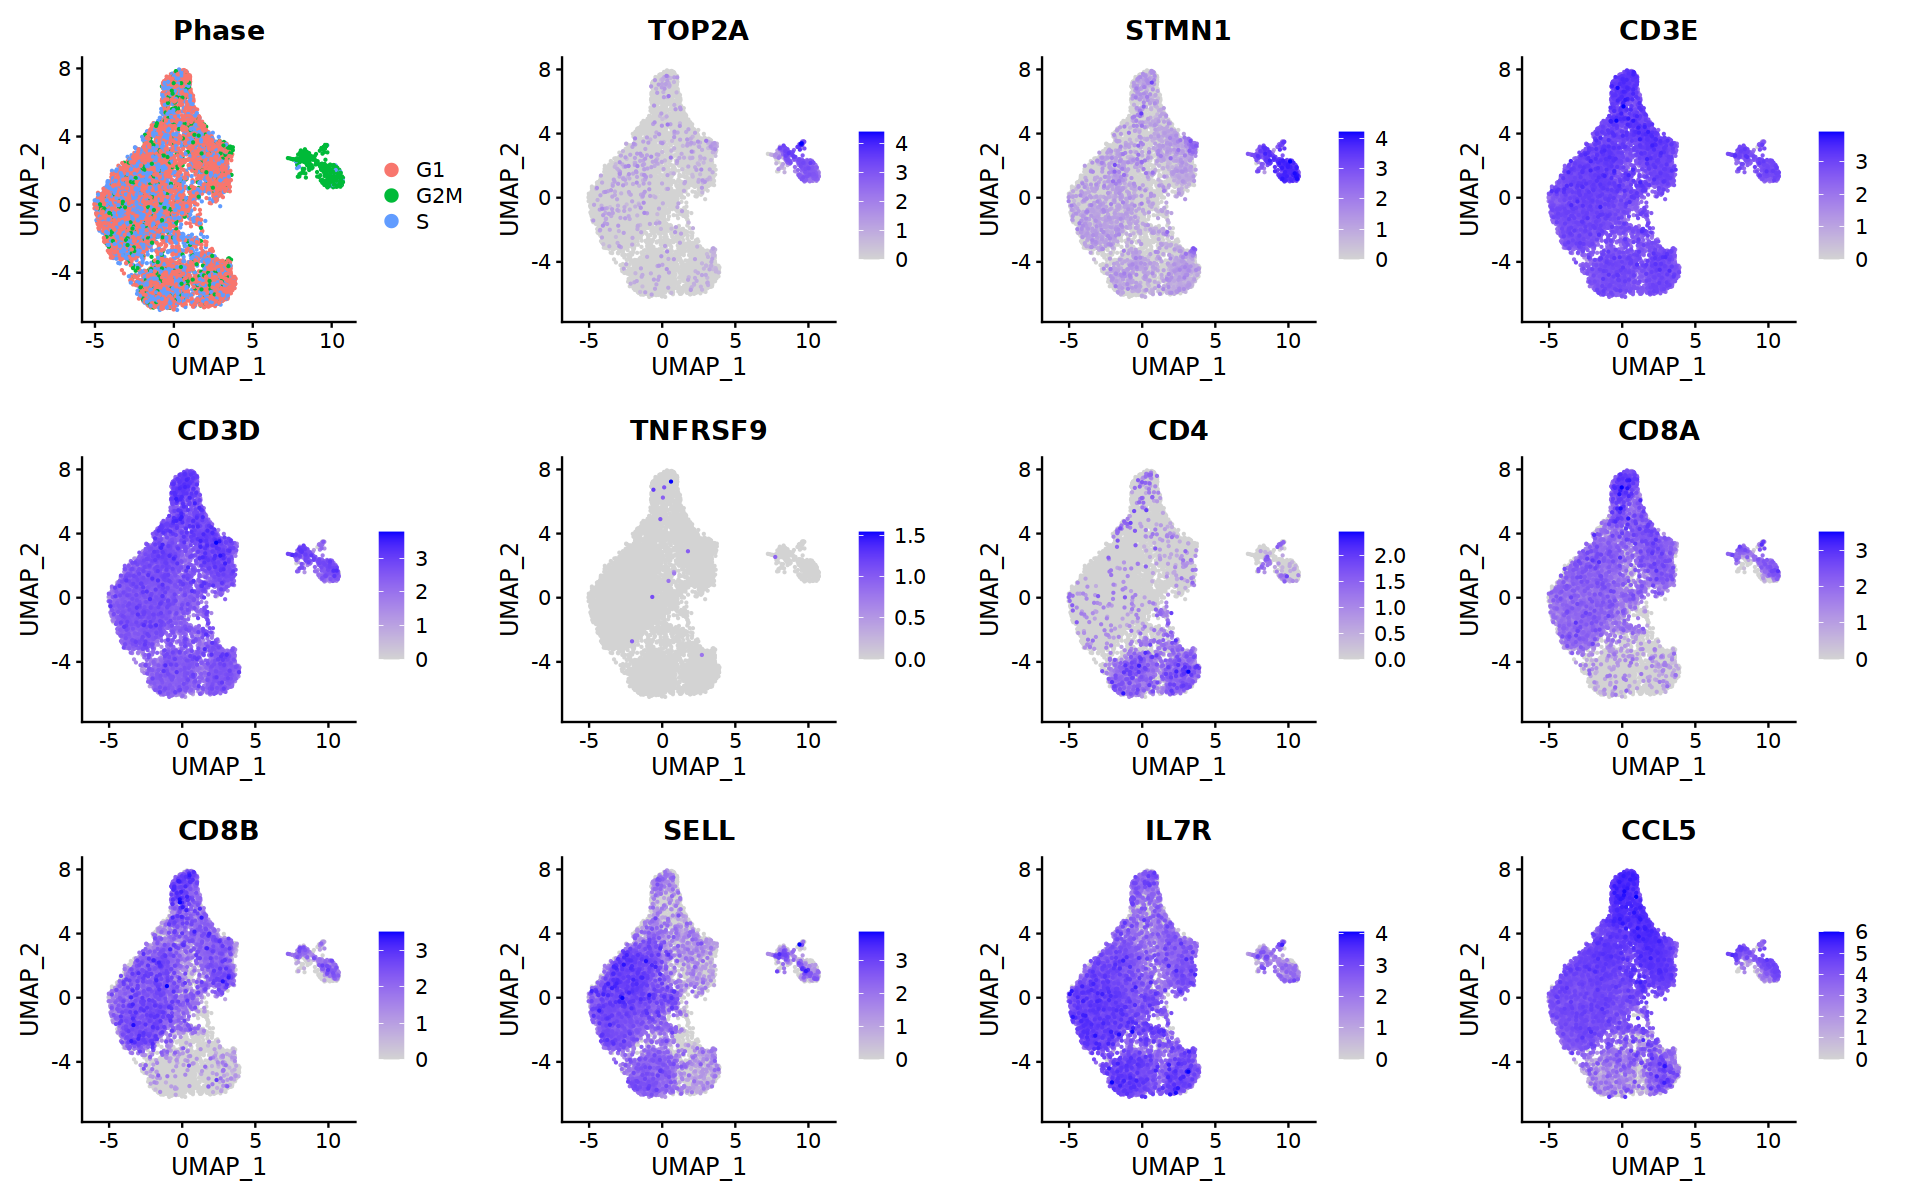

In [39]:
options(repr.plot.width = 16, repr.plot.height = 10, warn=-1,verbose = FALSE)
# show plots
cp <- cowplot::plot_grid(plotlist = list_plots,
                   align = "hv",
                   axis = "trbl",
                   ncol = 4,
                   nrow = 3)
cp

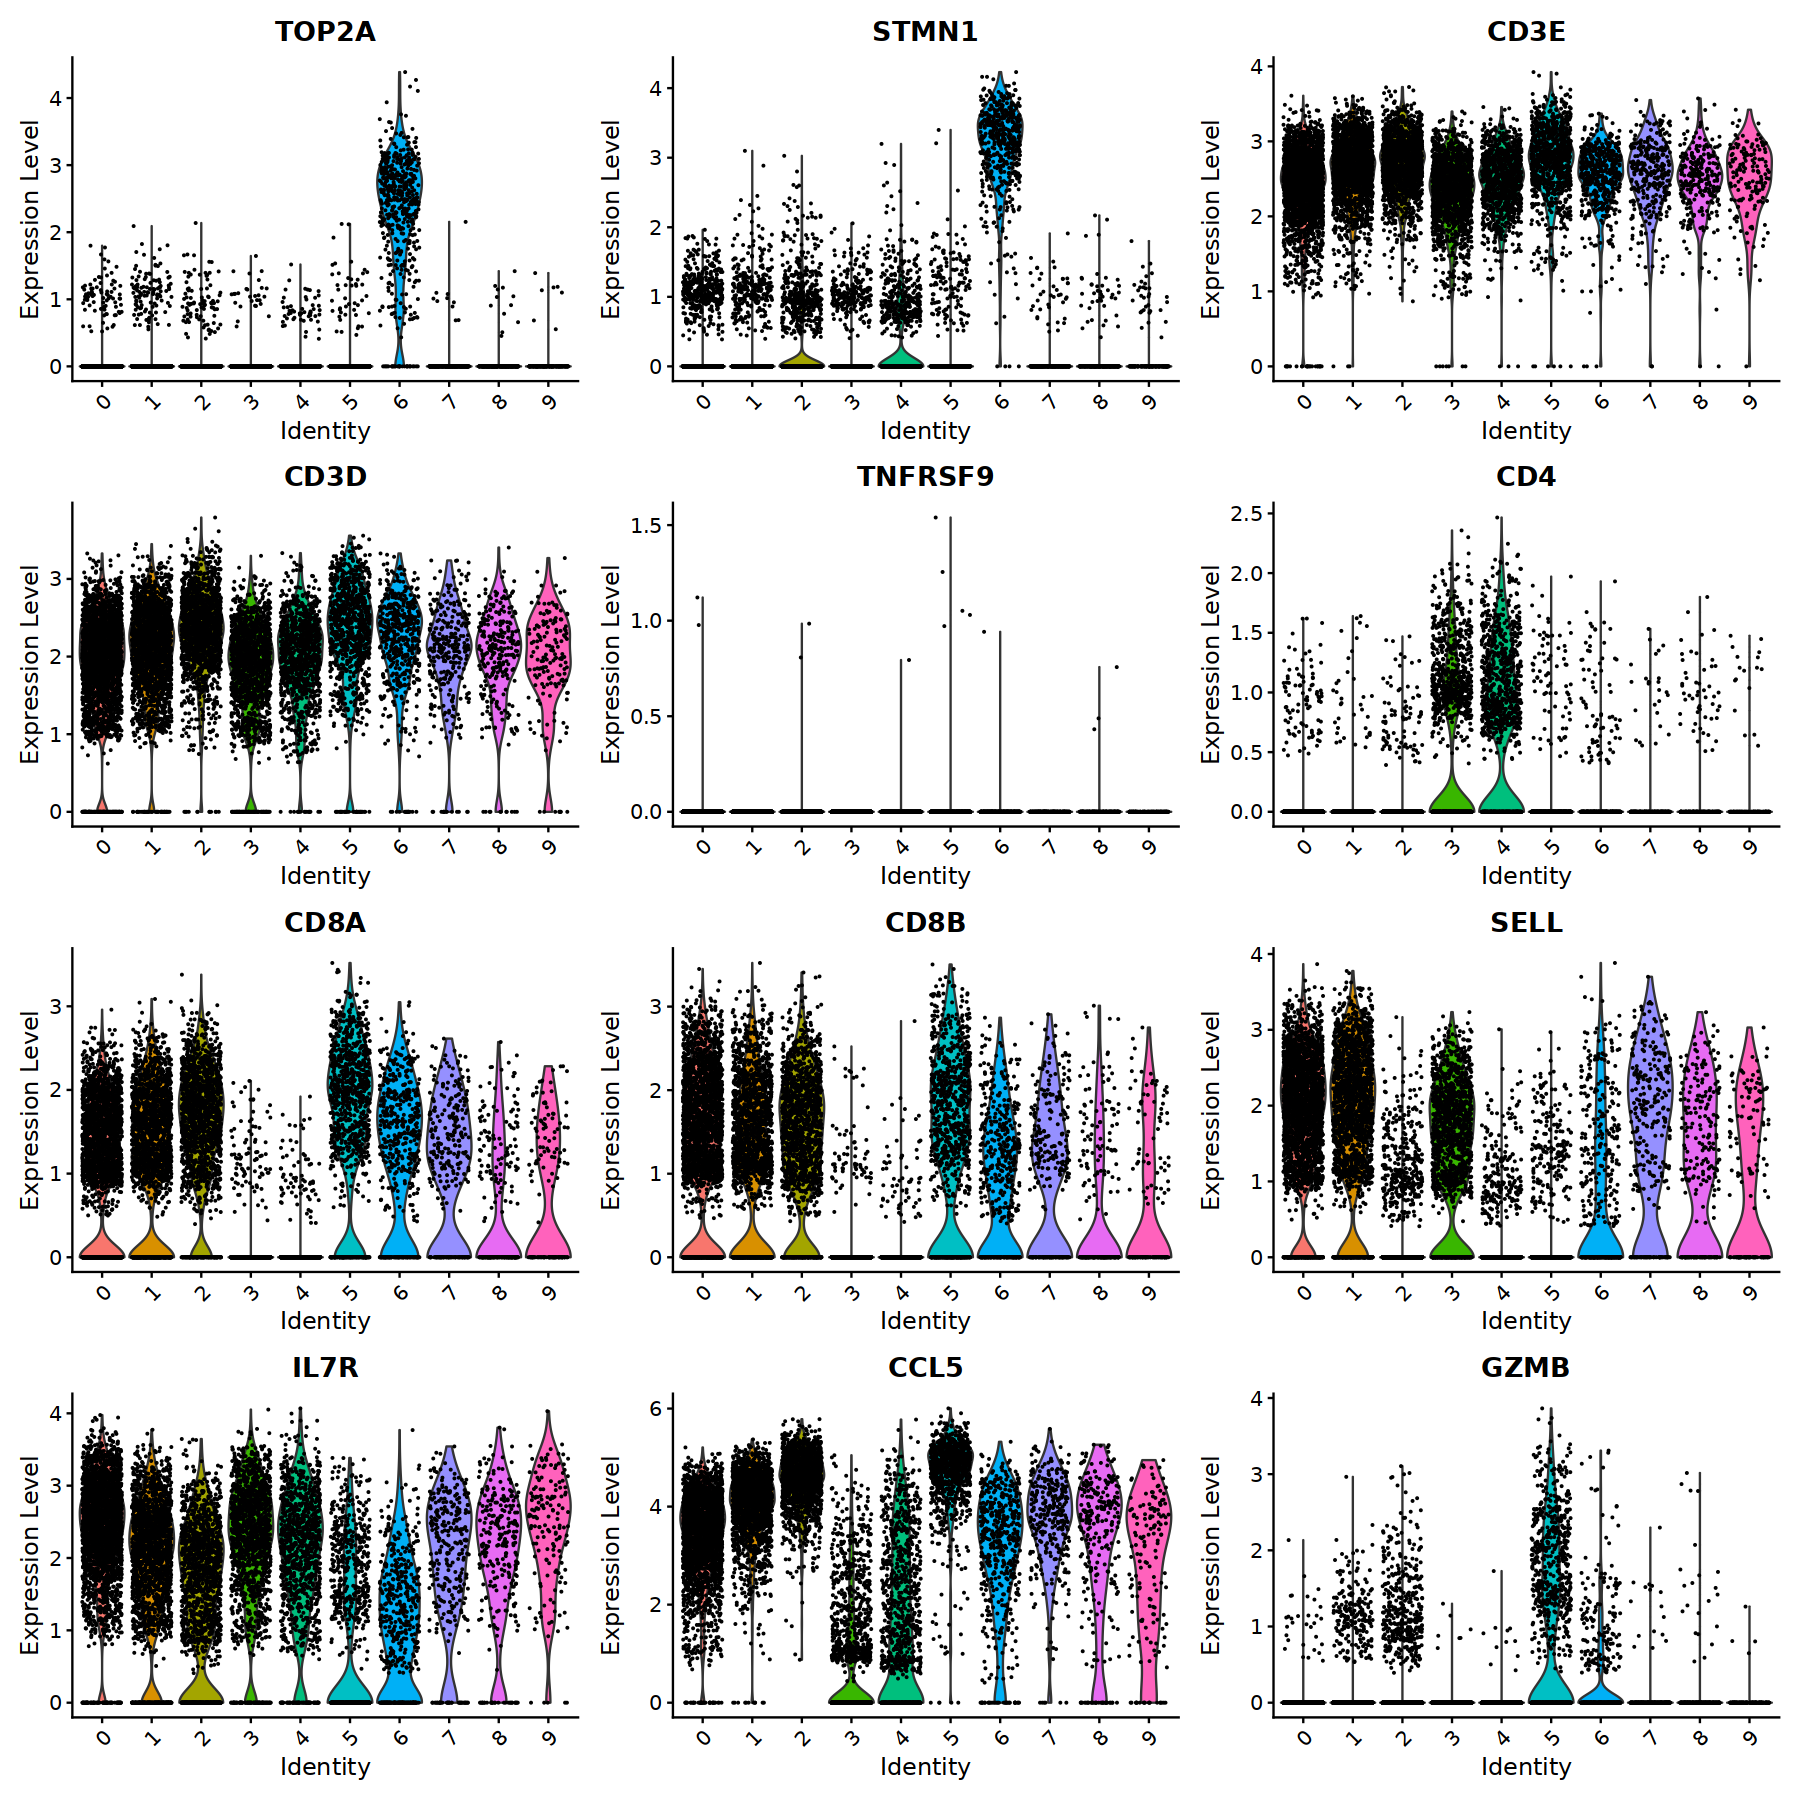

In [40]:
options(repr.plot.width = 15, repr.plot.height = 15, warn=-1,verbose = FALSE)

VlnPlot(seurat_obj, 
            feature=con_vars, ncol=3)

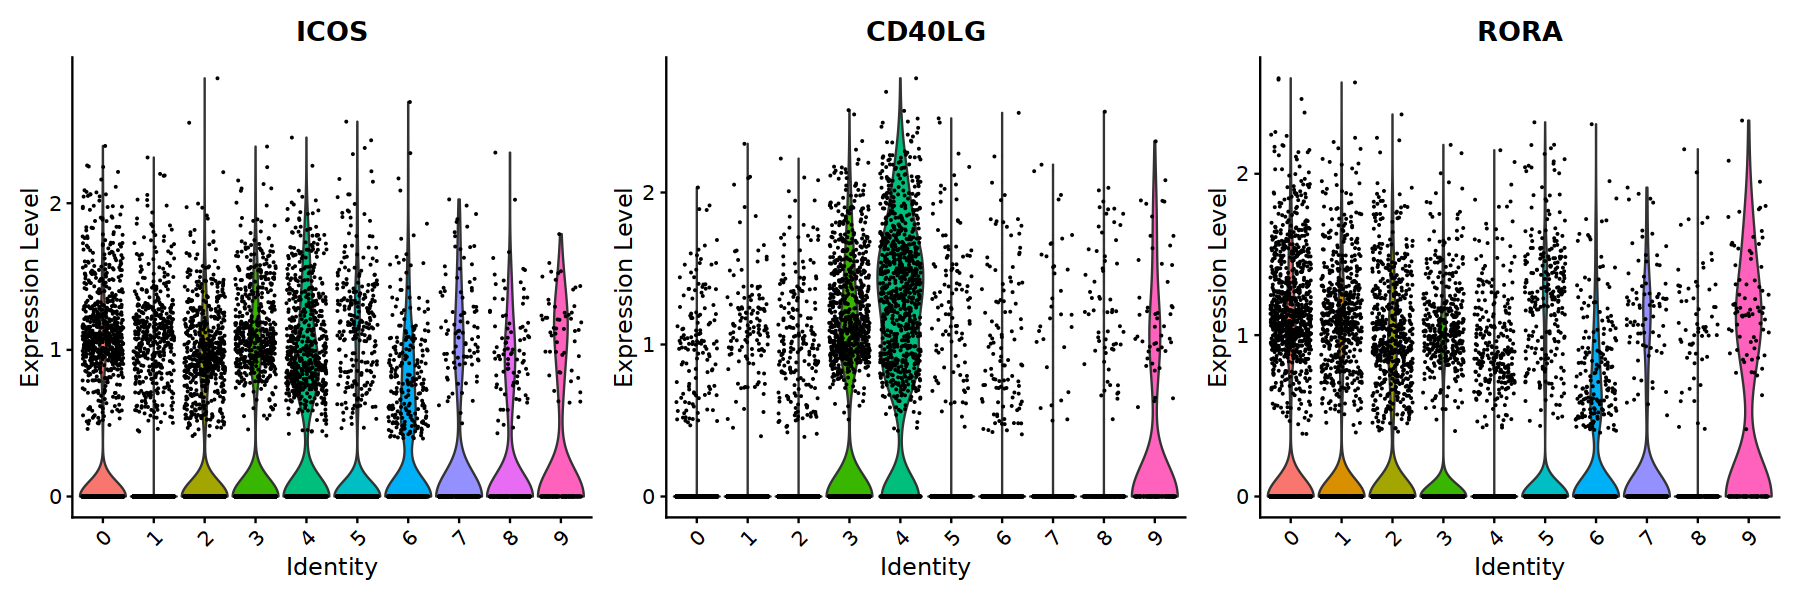

In [41]:
options(repr.plot.width = 15, repr.plot.height = 5, warn=-1,verbose = FALSE)

VlnPlot(seurat_obj, 
            feature=c("ICOS", "CD40LG", "RORA"), ncol=3)

In [42]:
seurat_obj$clusters <- Idents(seurat_obj)

# Save

In [43]:
saveRDS(seurat_obj, here(glue("{clust}/{robj_dir}/3.2-clustering_{sample}.rds")))

In [44]:
write_csv(rna.markers, here(glue("{clust}/{robj_dir}/3.2-clustering_{sample}.csv")))

# Session Info

In [45]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/groups/singlecell/isentis/conda_envs/ines_r4.1.1c/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] scran_1.22.1                scater_1.22.0              
 [3] scuttle_1.4.0               SingleCellExperiment_1.16.0
 [5] SummarizedExperiment_1.24.0 Biobase_2.54.0             
 [7] GenomicRanges_1.46.1        GenomeInfoDb_1.30.1        
 [9] IRanges_